# Dependencies and files

## Imports

In [1]:
import os
import time
import gseapy
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import utils.functional_analysis as utils

# Global variables

In [2]:
figures_dir = f'human_specific_genes/figures/'
os.makedirs(figures_dir, exist_ok=True)

In [3]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

## Load files

Load categorised genes

In [4]:
categorised_genes = pd.read_csv('data/human_specific_genes/gene_groups.csv', index_col=0).label
categorised_genes.head()

ERC1                age-specific
CHST10      maybe human-specific
ATP6V1G1            age-specific
GDE1        maybe human-specific
ZBTB18              age-specific
Name: label, dtype: object

Load validated human-specific genes

In [5]:
n_clusters = 6
filepath = f'data/human_specific_genes/human_clusters_edgeR_{n_clusters}.csv'
labels = pd.read_csv(filepath, index_col=0)['0']
hs_genes = labels.index
labels.head()

TMED3     1
RGS2      1
IGFBP2    1
IGFBP6    1
TRIR      2
Name: 0, dtype: int64

Load background genes

In [6]:
with open('data/human_specific_genes/background_genes.txt', 'r') as f:
    background_genes = f.read().split(",")

len(background_genes)

7801

# Functional analysis

## Gene categories

In [7]:
gene_clust = list()
enrich_results = list()

for group in ['age-specific', 'maybe age-specific', 'maybe human-specific', 'human-specific']:
    gene_set = categorised_genes[categorised_genes == group].index.to_list()
    gene_clust.append(utils.GeneCluster(gene_set, group, group, background_genes))
    time.sleep(1)

### GO_Biological_Process_2025

In [8]:
db_name = 'GO_Biological_Process_2025'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name)

In [9]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Vocal Learning (GO:0042297),1,0.000037,597.846154,6097.736182,"[NRXN1, NRXN2]",0.004379,0,0,2,2.358629,age-specific
Imitative Learning (GO:0098596),2,0.000037,597.846154,6097.736182,"[NRXN1, NRXN2]",0.004379,0,0,2,2.358629,age-specific
Auditory Behavior (GO:0031223),3,0.000037,597.846154,6097.736182,"[NRXN1, NRXN2]",0.004379,0,0,2,2.358629,age-specific
Learned Vocalization Behavior or Vocal Learning (GO:0098598),4,0.000037,597.846154,6097.736182,"[NRXN1, NRXN2]",0.004379,0,0,2,2.358629,age-specific
Postsynaptic Density Assembly (GO:0097107),5,0.000123,199.230769,1793.071413,"[NRXN1, NRXN2]",0.008304,0,0,2,2.080715,age-specific


In [10]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

12

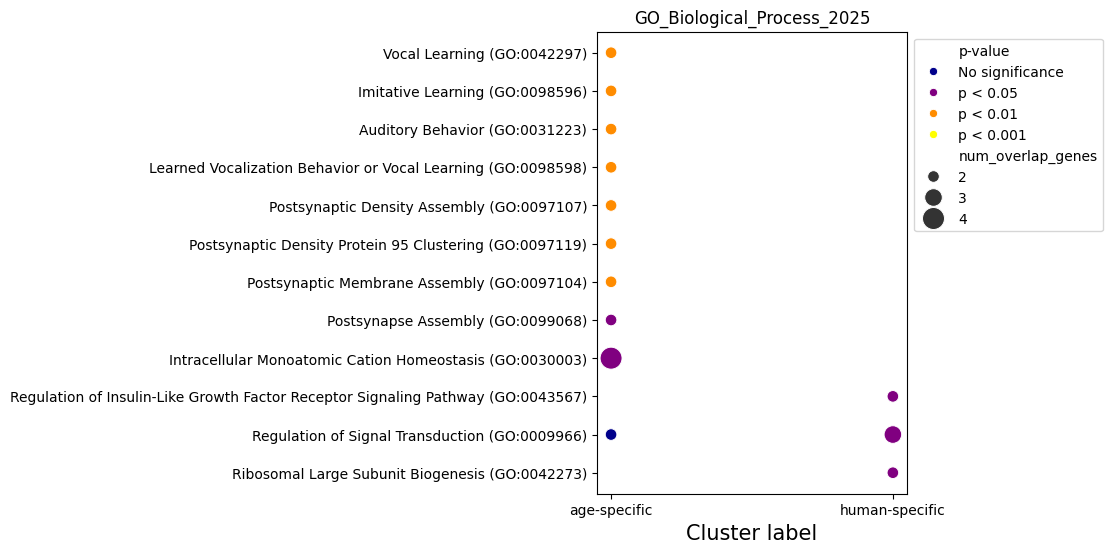

In [11]:
fig, ax = utils.scatter_enrichment(
    enrich_res,
    terms,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(4, 6),
    dpi=100,
    size_range=(70, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

plt.savefig(f'{figures_dir}/go_biological_processes_2025_validation.jpg', bbox_inches='tight')
plt.savefig(f'{figures_dir}/go_biological_processes_2025_validation.pdf', bbox_inches='tight')
plt.show()

In [12]:
enrich_results.append(enrich_res.copy())

### Azimuth_Cell_Types_2021

In [13]:
db_name = 'Azimuth_Cell_Types_2021'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [14]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
RORB+ LNX2+ Layer 3-5 Glutamatergic Neuron CL0000679,1,0.014283,95.925926,407.561574,[PCP4],0.021350,0,0,1,1.670602,age-specific
VIP+ SLC7A6OS+ Layer 1-6 GABAergic Neuron CL0000617,2,0.017822,71.935185,289.704335,[PCP4],0.021350,0,0,1,1.670602,age-specific
Vip+ GABAergic Neuron 2 CL0000617,3,0.021350,57.540741,221.342161,[NRXN1],0.021350,0,0,1,1.670602,age-specific
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0000679,1,0.000008,1415.818182,16673.276418,"[RALYL, PDE1A]",0.000108,0,0,2,3.968308,maybe age-specific
FEZF2+ LPO+ Layer 5-6 Glutamatergic Neuron CL0000679,2,0.003330,648.916667,3701.872163,[ALCAM],0.012505,0,0,1,1.902933,maybe age-specific


In [15]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

19

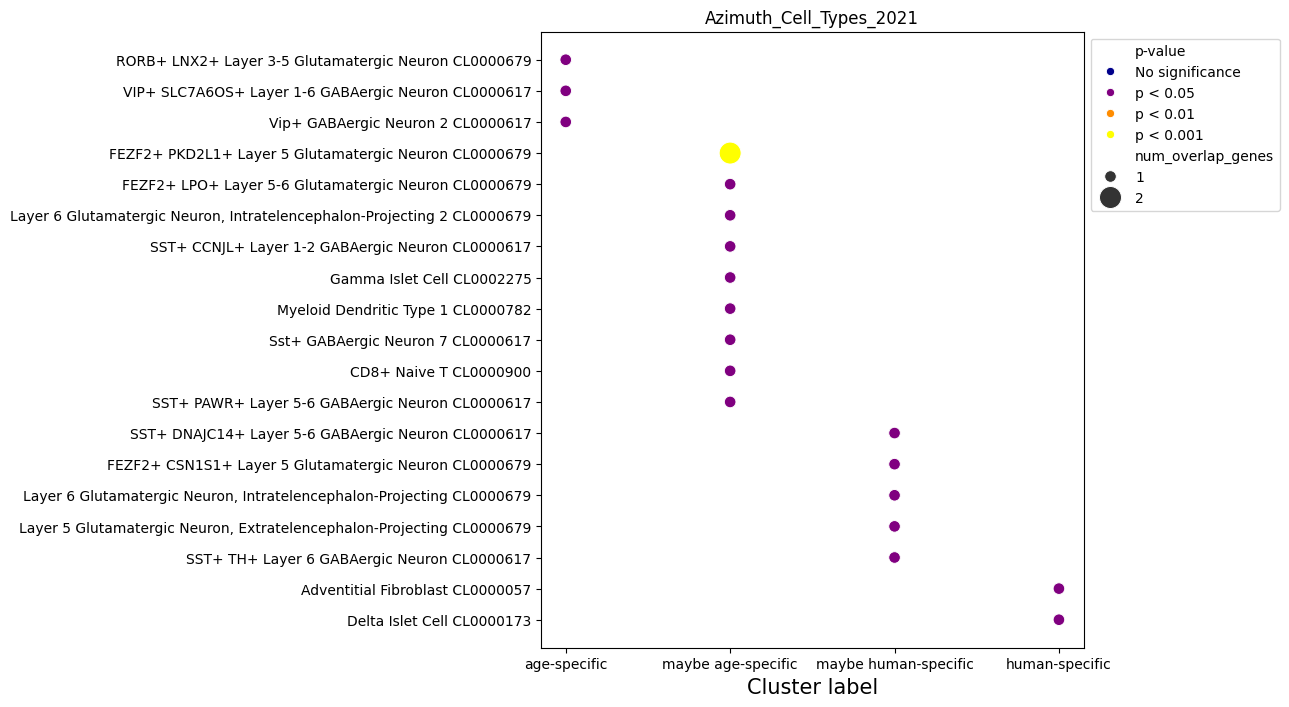

In [16]:
fig, ax = utils.scatter_enrichment(
    enrich_res,
    terms,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(7, 8),
    dpi=100,
    size_range=(70, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

plt.show()

### WikiPathways_2024_Human

In [17]:
db_name = 'WikiPathways_2024_Human'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [18]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Disruption Of Postsynaptic Signaling By CNV WP4875,1,0.000128,37.190400,333.423133,"[SYNGAP1, NRXN1, NRXN2]",0.006899,0,0,3,2.161187,age-specific
Sudden Infant Death Syndrome SIDS Susceptibility Pathways WP706,2,0.002353,12.835000,77.680181,"[YWHAE, ATP1A3, SCN3B]",0.063521,0,0,3,1.197080,age-specific
Creatine Pathway WP5190,3,0.014283,95.925926,407.561574,[CKB],0.167841,0,0,1,0.775102,age-specific
Osteoclast Signaling WP12,4,0.021350,57.540741,221.342161,[ATP6V1G1],0.167841,0,0,1,0.775102,age-specific
Biomarkers For Pyrimidine Metabolism Disorders WP4584,5,0.021350,57.540741,221.342161,[CKB],0.167841,0,0,1,0.775102,age-specific


In [19]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

10

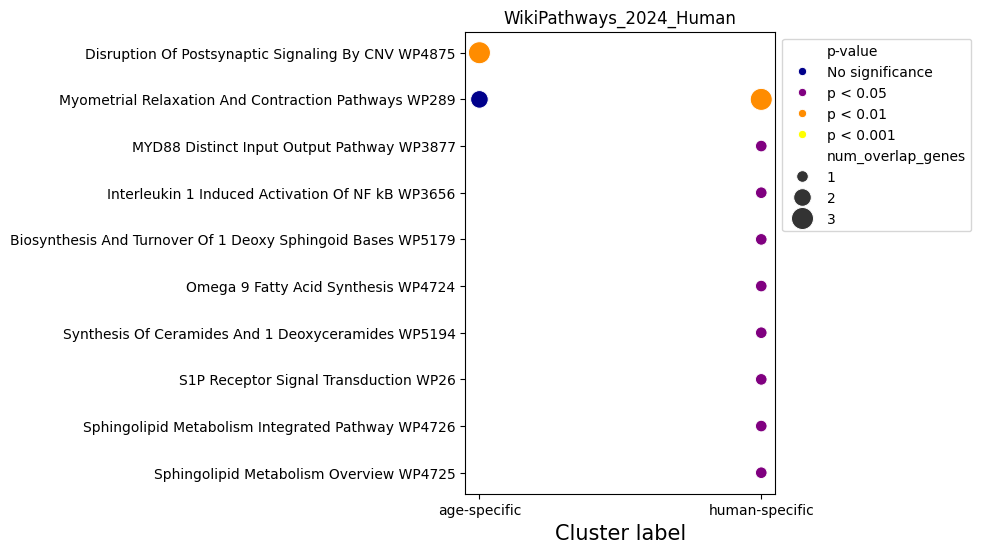

In [20]:
fig, ax = utils.scatter_enrichment(
    enrich_res,
    terms,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(4, 6),
    dpi=100,
    size_range=(70, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

plt.savefig(f'{figures_dir}/wikipathways_2024_human_validation.jpg', bbox_inches='tight')
plt.savefig(f'{figures_dir}/wikipathways_2024_human_validation.pdf', bbox_inches='tight')
plt.show()

In [21]:
enrich_results.append(enrich_res.copy())

### Combined

In [22]:
db_name = "Biological Processes & WikiPathways"
enrich_res_combined = pd.concat(enrich_results)
enrich_res_combined.head()

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Vocal Learning (GO:0042297),1,0.000037,597.846154,6097.736182,"[NRXN1, NRXN2]",0.004379,0,0,2,2.358629,age-specific
Imitative Learning (GO:0098596),2,0.000037,597.846154,6097.736182,"[NRXN1, NRXN2]",0.004379,0,0,2,2.358629,age-specific
Auditory Behavior (GO:0031223),3,0.000037,597.846154,6097.736182,"[NRXN1, NRXN2]",0.004379,0,0,2,2.358629,age-specific
Learned Vocalization Behavior or Vocal Learning (GO:0098598),4,0.000037,597.846154,6097.736182,"[NRXN1, NRXN2]",0.004379,0,0,2,2.358629,age-specific
Postsynaptic Density Assembly (GO:0097107),5,0.000123,199.230769,1793.071413,"[NRXN1, NRXN2]",0.008304,0,0,2,2.080715,age-specific


In [23]:
terms = enrich_res_combined[(enrich_res_combined['Adjusted P-value'] < 0.05) & (enrich_res_combined.Rank < 7)].index.unique()
terms.size

16

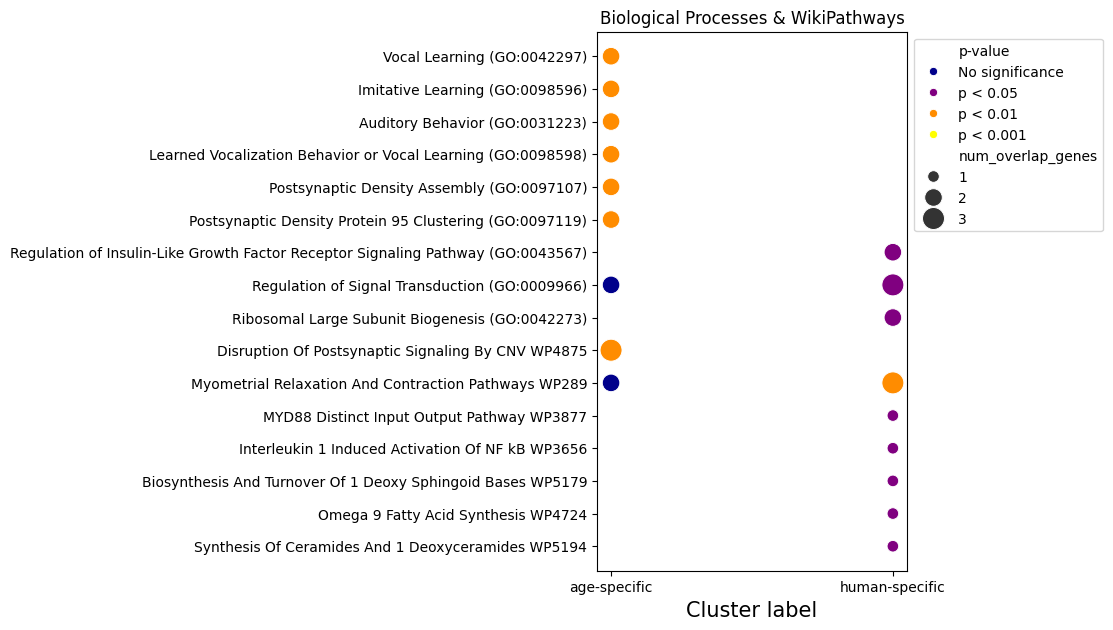

In [24]:
fig, ax = utils.scatter_enrichment(
    enrich_res_combined,
    terms,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(4, 7),
    dpi=100,
    size_range=(70, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

plt.savefig(f'{figures_dir}/enrichment_human_validation.jpg', bbox_inches='tight')
plt.savefig(f'{figures_dir}/enrichment_human_validation.pdf', bbox_inches='tight')
plt.show()

In [25]:
with open('data/human_specific_genes/enrichment_human_validation_terms.txt', 'w') as f:
    writer = f.write('\n'.join(terms.tolist()))

## Human-specific clusters

In [26]:
gene_clust = list()
results = list()

for label in tqdm(sorted(labels.unique())):
    genes = labels[labels == label].index.tolist()
    descr = f'Genes for spectral clustering ({n_clusters} clusters) of human-specific genes. Cluster label: {label}'
    gene_clust.append(utils.GeneCluster(genes, descr, label, background_genes))
    time.sleep(1)

  0%|          | 0/6 [00:00<?, ?it/s]

## GO_Biological_Process_2025

In [27]:
db_name = 'GO_Biological_Process_2025'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name)

In [28]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Regulation of Insulin-Like Growth Factor Receptor Signaling Pathway (GO:0043567),1,0.000007,1112.857143,13194.840937,"[IGFBP2, IGFBP6]",0.000291,0,0,2,3.536526,1
Regulation of Signal Transduction (GO:0009966),2,0.000016,188.729508,2085.541223,"[RGS2, IGFBP2, IGFBP6]",0.000326,0,0,3,3.487385,1
Negative Regulation of Canonical Wnt Signaling Pathway (GO:0090090),3,0.000381,126.819672,998.367647,"[IGFBP2, IGFBP6]",0.005209,0,0,2,2.283251,1
Negative Regulation of Wnt Signaling Pathway (GO:0030178),4,0.000570,102.960000,769.159983,"[IGFBP2, IGFBP6]",0.005839,0,0,2,2.233662,1
Negative Regulation of Lipase Activity (GO:0060192),5,0.001025,2598.666667,17886.052524,[RGS2],0.008407,0,0,1,2.075340,1


In [29]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 7)].index.unique()
terms.size

36

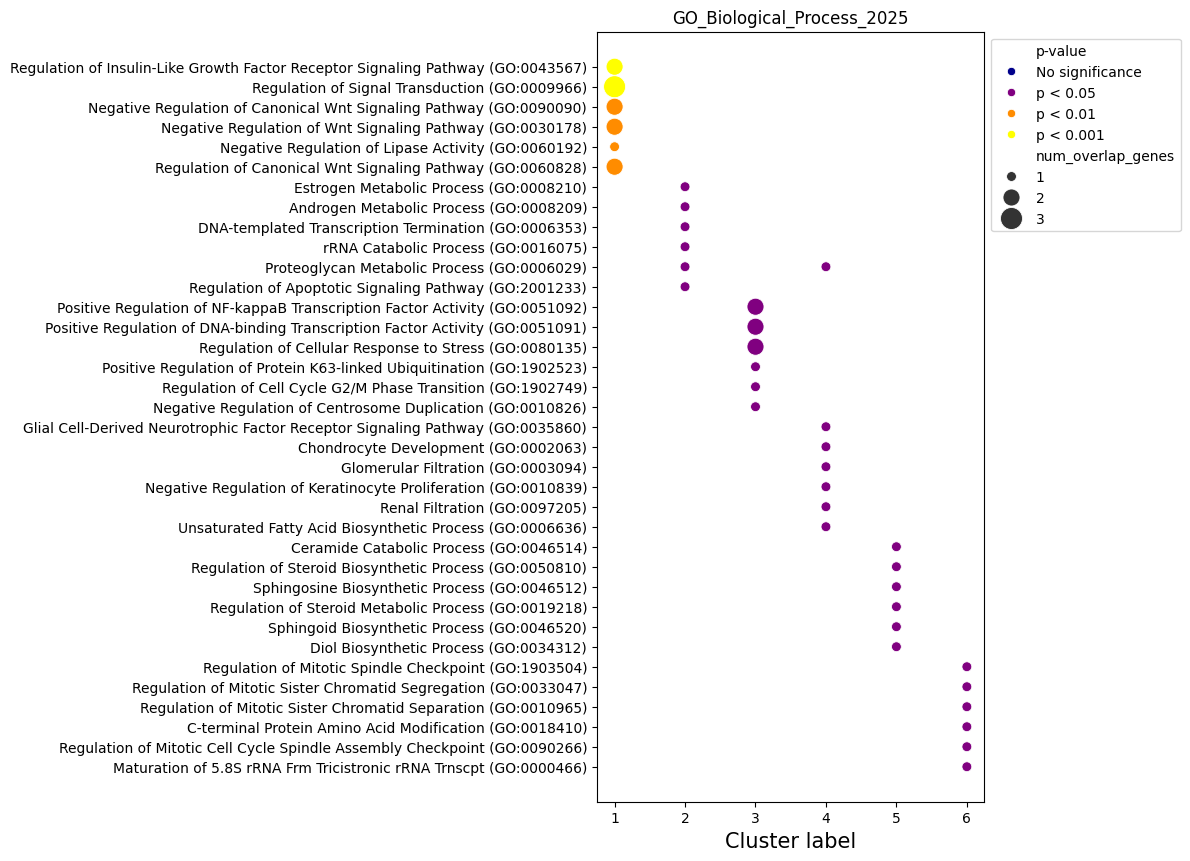

In [30]:
fig, ax = utils.scatter_enrichment(
    enrich_res,
    terms,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(5, 10),
    dpi=100,
    size_range=(50, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

plt.savefig(f'{figures_dir}/go_biological_processes_2025_clusters.jpg', bbox_inches='tight')
plt.savefig(f'{figures_dir}/go_biological_processes_2025_clusters.pdf', bbox_inches='tight')
plt.show()

In [31]:
with open('data/human_specific_genes/go_biological_processes_2025_clusters_terms.txt', 'w') as f:
    writer = f.write('\n'.join(terms.tolist()))

## Azimuth Cell Types 2021


In [32]:
db_name = 'Azimuth_Cell_Types_2021'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name)

In [33]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

/tmp/ipykernel_1930/2388961702.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])


,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Adventitial Fibroblast CL0000057,1,0.003074,519.466667,3005.078861,[IGFBP6],0.003585,0,0,1,2.4455,1
Delta Islet Cell CL0000173,2,0.003585,432.833333,2437.272342,[RGS2],0.003585,0,0,1,2.4455,1
SST+ DNAJC14+ Layer 5-6 GABAergic Neuron CL0000617,1,0.001538,1299.166667,8415.358911,[PTPRK],0.003585,0,0,1,2.4455,4
FEZF2+ CSN1S1+ Layer 5 Glutamatergic Neuron CL0000679,2,0.002562,649.416667,3875.109058,[SULF2],0.003585,0,0,1,2.4455,4
"Layer 6 Glutamatergic Neuron, Intratelencephalon-Projecting CL0000679",3,0.003074,519.466667,3005.078861,[PTPRK],0.003585,0,0,1,2.4455,4


In [34]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

7

(<Figure size 400x500 with 1 Axes>,
 <Axes: title={'center': 'Azimuth_Cell_Types_2021'}, xlabel='Cluster label'>)

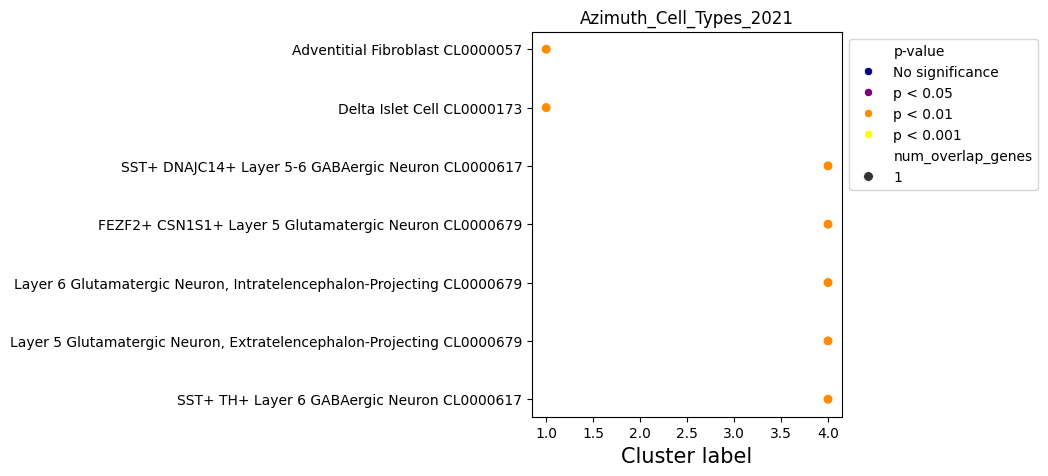

In [35]:
utils.scatter_enrichment(
    enrich_res,
    terms,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(4, 5),
    dpi=100,
    size_range=(50, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

## SynGO_2024


In [36]:
db_name = 'SynGO_2024'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name)

In [37]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

/tmp/ipykernel_1930/2388961702.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])


,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Regulation Protein Catabolic Process At Postsynapse (GO:0140252) BP,1,0.007670,176.931818,861.745530,[UBE2V1],0.015339,0,0,1,1.814199,3
Postsynaptic Density (GO:0014069) CC,2,0.082408,14.515152,36.230871,[UBE2V1],0.082408,0,0,1,1.084031,3
Modification Of Postsynaptic Structure (GO:0099010) BP,1,0.003585,432.833333,2437.272342,[DLGAP4],0.012280,0,0,1,1.910803,5
Postsynaptic Specialization (GO:0099572) CC,2,0.006140,235.939394,1201.623878,[DLGAP4],0.012280,0,0,1,1.910803,5
Regulation Of Synapse Maturation (GO:0090128) BP,3,0.011743,117.803030,523.570897,[DLGAP4],0.015658,0,0,1,1.805266,5


In [38]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

4

(<Figure size 400x400 with 1 Axes>,
 <Axes: title={'center': 'SynGO_2024'}, xlabel='Cluster label'>)

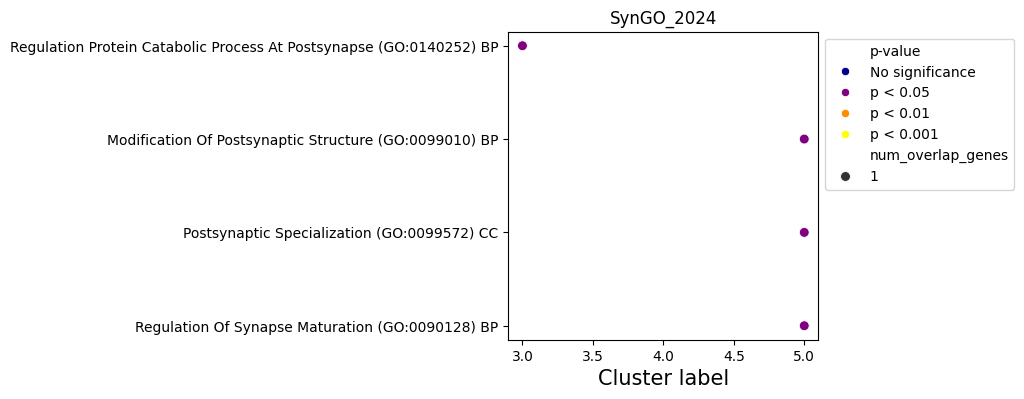

In [39]:
utils.scatter_enrichment(
    enrich_res,
    terms,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(4, 4),
    dpi=100,
    size_range=(50, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

## WikiPathways_2024_Human

In [40]:
db_name = 'WikiPathways_2024_Human'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [41]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Myometrial Relaxation And Contraction Pathways WP289,1,0.000005,278.819277,3395.910935,"[RGS2, IGFBP2, IGFBP6]",0.000026,0,0,3,4.590569,1
Photodynamic Therapy Induced HIF 1 Survival Signaling WP3614,2,0.010218,136.456140,625.466594,[IGFBP2],0.025544,0,0,1,1.592712,1
Glucocorticoid Receptor Pathway WP2880,3,0.018335,73.923810,295.616555,[RGS2],0.030559,0,0,1,1.514867,1
Calcium Regulation In Cardiac Cells WP536,4,0.044868,29.200758,90.639786,[RGS2],0.056085,0,0,1,1.251149,1
Nuclear Receptors Meta Pathway WP2882,5,0.065510,19.658974,53.581632,[RGS2],0.065510,0,0,1,1.183694,1


In [42]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 5)].index.unique()
terms.size

17

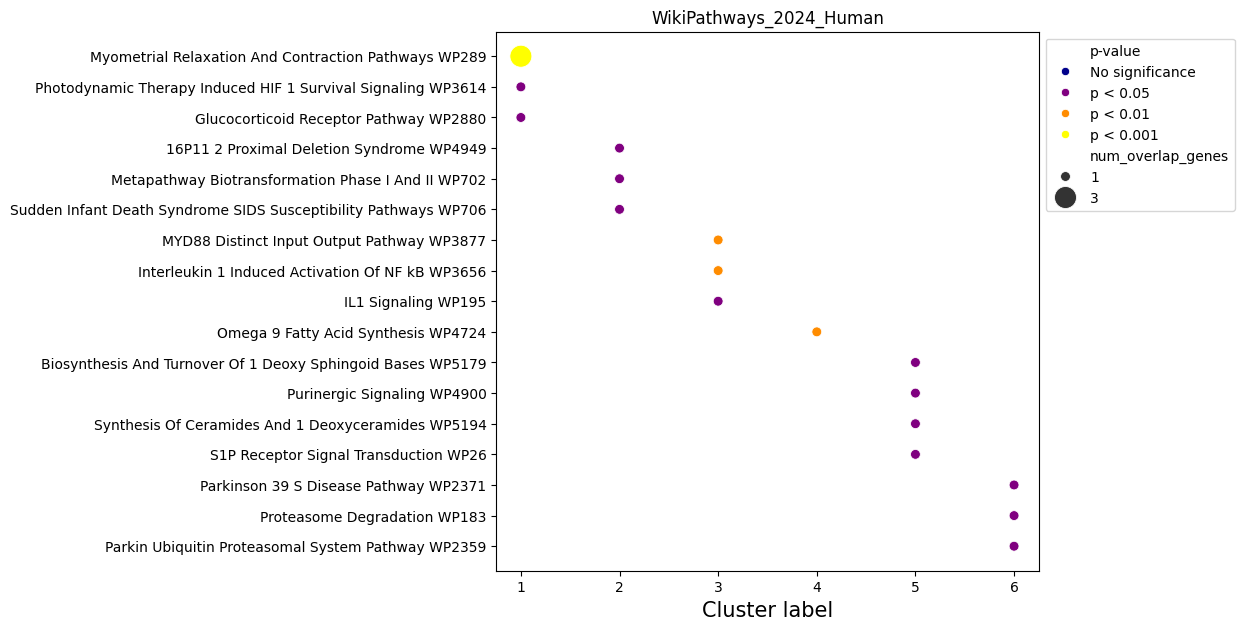

In [43]:
fig, ax = utils.scatter_enrichment(
    enrich_res,
    terms,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(7, 7),
    dpi=100,
    size_range=(50, 250),
    fontsize_row=5,
    fontsize_axis=15,
)